<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg Session Length    500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB
       Avg Session Length  Time on App  Time on Website  Length of Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%         

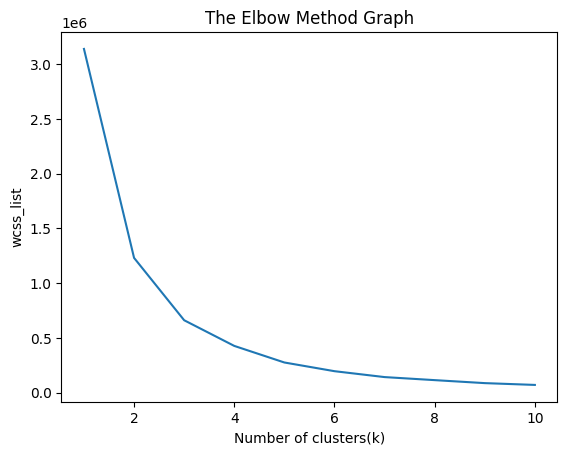

/tmp/ipykernel_11023/3776857601.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[cols])
/tmp/ipykernel_11023/3776857601.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[cols])
/tmp/ipykernel_11023/3776857601.py:47: UserWarning: 

`distplot` is a deprecated function and wi

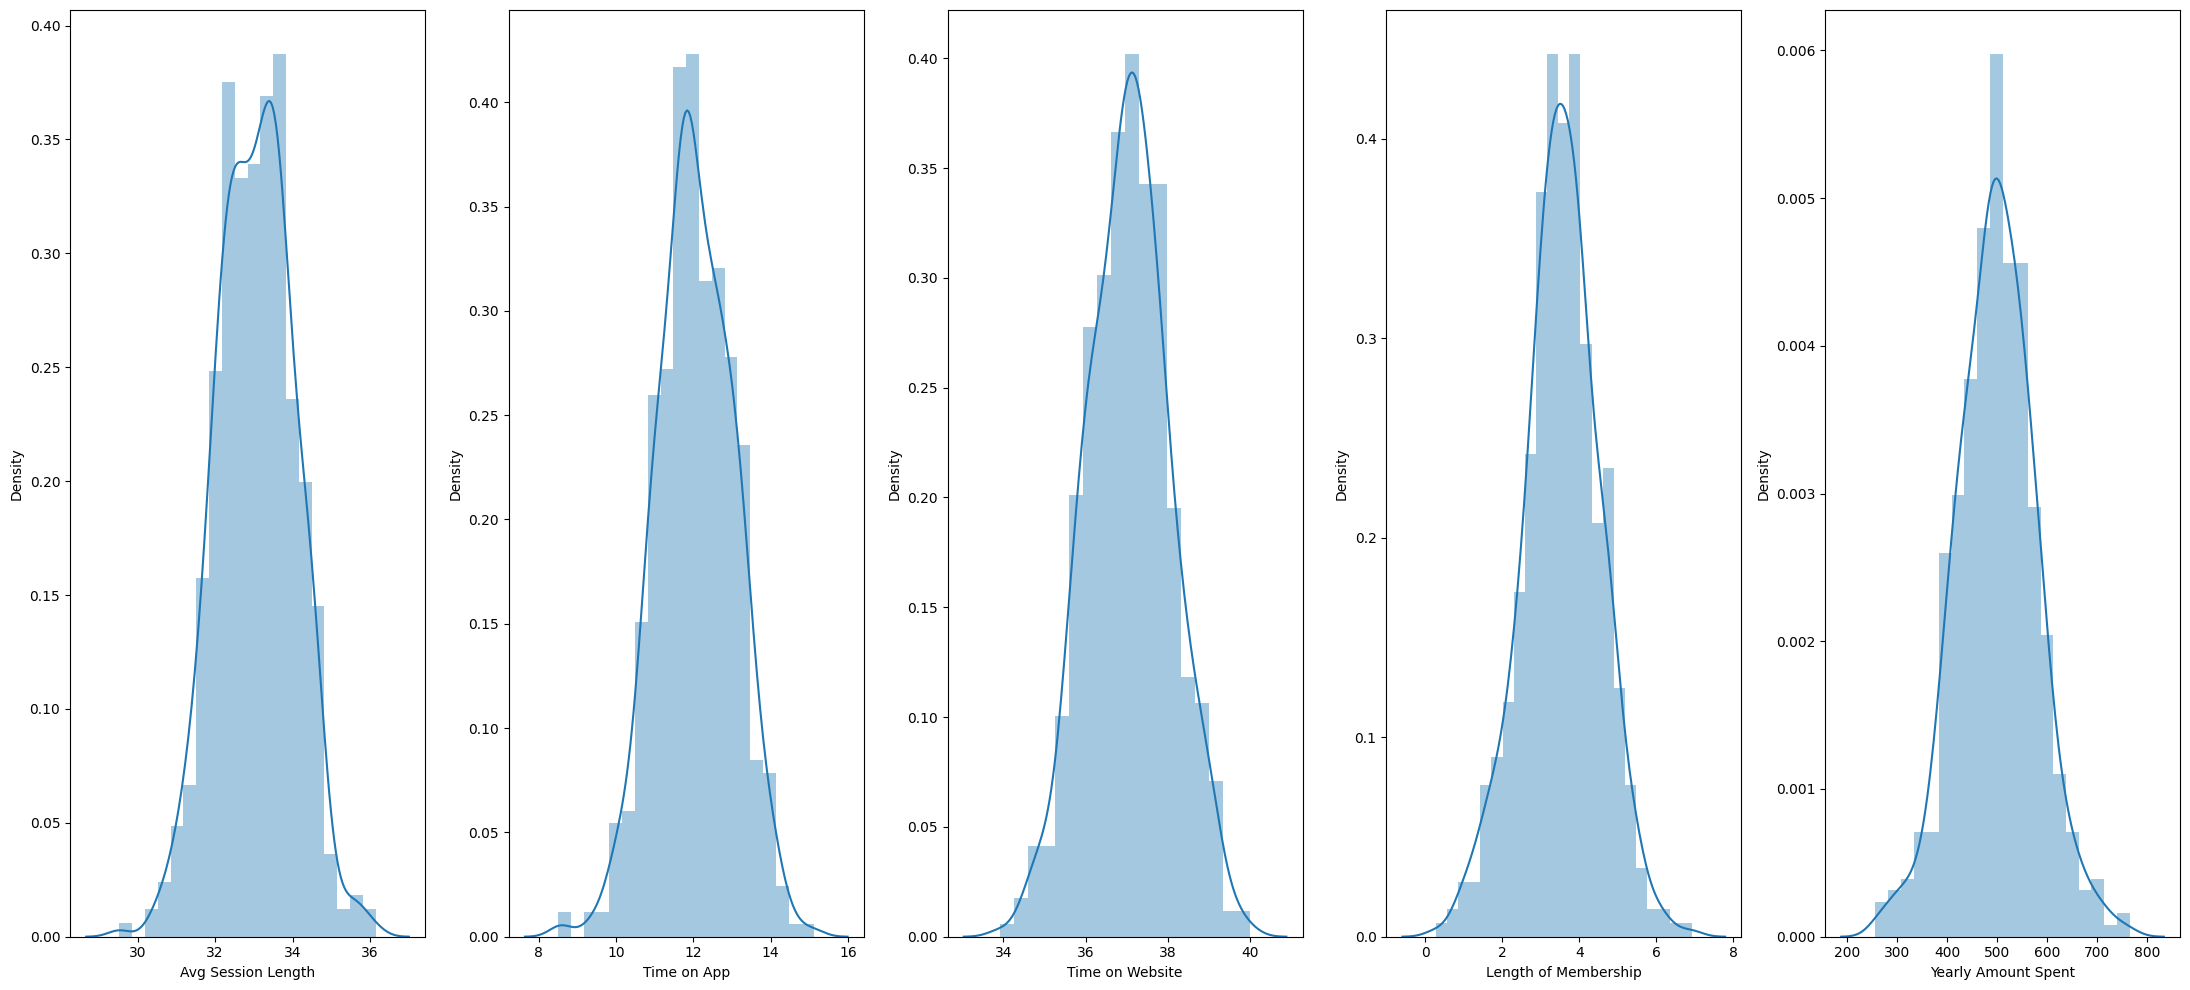

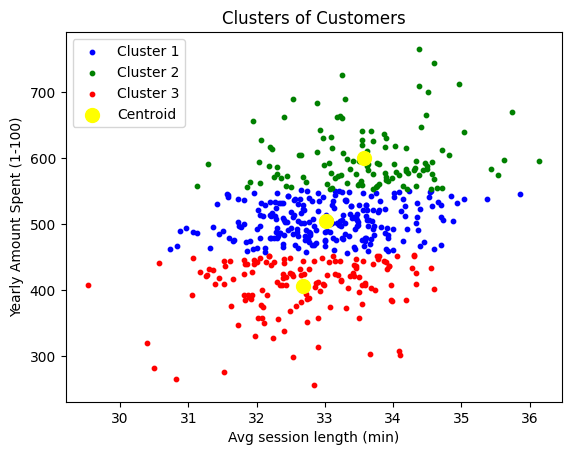

In [7]:

import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import plotly.graph_objects as go

dataset = pd.read_csv('../data/customer_copy.csv')

x = dataset.iloc[:, [0,4]].values  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  

dataset.head()
dataset.shape
dataset.info()
#customersdata.describe()
with pd.option_context('display.max_columns', 40):
    print(dataset.describe(include='all'))

#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  


#plotting the distribution graph
plot.figure(figsize = (22, 10))
plotnum = 1

for cols in ['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership','Yearly Amount Spent', ]:
    if plotnum <= 5:
        axs = plot.subplot(1, 5, plotnum)
        sns.distplot(dataset[cols])

    plotnum += 1

plot.tight_layout()
plot.show()

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)



#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster  
# mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
# mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of Customers')  
mtp.xlabel('Avg session length (min)')  
mtp.ylabel('Yearly Amount Spent (1-100)')  
mtp.legend()  
mtp.show() 